In [171]:
!pip install joypy

In [173]:
import pandas as pd
import re
import joypy
import matplotlib.pyplot as plt

<h2> 0. Preprocesado válido para todas las visualizaciones </h2>

<h3> Cargar los datos originales </h3>

In [3]:
df = pd.read_csv('casos_hosp_uci_def_sexo_edad_provres.csv')
df.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


### Eliminar columnas que no se utilizarán
Las columnas *num_hosp* y *num_uci* no serán utilizadas en ninguna de las visualizaciones


In [4]:
df.drop(columns=['num_hosp', 'num_uci'], inplace=True)
df.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_def
0,A,H,0-9,2020-01-01,0,0
1,A,H,10-19,2020-01-01,0,0
2,A,H,20-29,2020-01-01,0,0
3,A,H,30-39,2020-01-01,0,0
4,A,H,40-49,2020-01-01,0,0


### Separar el campo *fecha* en tres nuevos campos (*dia*, *mes* y *año*)

In [5]:
df['fecha'] = df['fecha'].str.split('-')
df.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_def
0,A,H,0-9,"[2020, 01, 01]",0,0
1,A,H,10-19,"[2020, 01, 01]",0,0
2,A,H,20-29,"[2020, 01, 01]",0,0
3,A,H,30-39,"[2020, 01, 01]",0,0
4,A,H,40-49,"[2020, 01, 01]",0,0


In [6]:
df['año'] = df['fecha'].str[0].astype(int)
df['mes'] = df['fecha'].str[1].astype(int)
df['dia'] = df['fecha'].str[2].astype(int)
df.drop(columns=['fecha'], inplace=True)
df.head()

,provincia_iso,sexo,grupo_edad,num_casos,num_def,año,mes,dia
0,A,H,0-9,0,0,2020,1,1
1,A,H,10-19,0,0,2020,1,1
2,A,H,20-29,0,0,2020,1,1
3,A,H,30-39,0,0,2020,1,1
4,A,H,40-49,0,0,2020,1,1


In [7]:
df.describe()

,num_casos,num_def,año,mes,dia
count,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06
mean,8.918336e+00,8.017059e-02,2.020657e+03,6.039168e+00,1.564871e+01
std,5.078984e+01,8.060844e-01,6.601430e-01,3.561104e+00,8.762068e+00
min,0.000000e+00,0.000000e+00,2.020000e+03,1.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,2.020000e+03,3.000000e+00,8.000000e+00
50%,0.000000e+00,0.000000e+00,2.021000e+03,6.000000e+00,1.600000e+01
75%,4.000000e+00,0.000000e+00,2.021000e+03,9.000000e+00,2.300000e+01
max,3.750000e+03,1.000000e+02,2.022000e+03,1.200000e+01,3.100000e+01


### Corregir códigos ISO de provincia

In [8]:
df['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', nan, 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [9]:
len(df['provincia_iso'].unique())

53

In [10]:
df['provincia_iso'] = df['provincia_iso'].astype(str)

In [11]:
df.loc[(df['provincia_iso'] == 'nan')].head()

,provincia_iso,sexo,grupo_edad,num_casos,num_def,año,mes,dia
930,nan,H,0-9,0,0,2020,1,1
931,nan,H,10-19,0,0,2020,1,1
932,nan,H,20-29,0,0,2020,1,1
933,nan,H,30-39,0,0,2020,1,1
934,nan,H,40-49,0,0,2020,1,1


In [12]:
df.drop(df[df['provincia_iso'] == 'nan'].index, inplace=True)
df['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', 'NC', 'O', 'OR',
       'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T', 'TE',
       'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [13]:
df.loc[df['provincia_iso'] == 'NC', 'provincia_iso'] = 'NA'

In [14]:
df['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', 'NA', 'O', 'OR',
       'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T', 'TE',
       'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [15]:
len(df['provincia_iso'].unique())

52

### Formatear el campo sexo

In [16]:
df['sexo'] = df['sexo'].map({'H': 'Hombre', 'M': 'Mujer', 'NC': 'No consta'})
df.head()

,provincia_iso,sexo,grupo_edad,num_casos,num_def,año,mes,dia
0,A,Hombre,0-9,0,0,2020,1,1
1,A,Hombre,10-19,0,0,2020,1,1
2,A,Hombre,20-29,0,0,2020,1,1
3,A,Hombre,30-39,0,0,2020,1,1
4,A,Hombre,40-49,0,0,2020,1,1


### Sustituir el código ISO por el nombre de la provincia y añadir informacion sobre la comunidad autonoma
Las provincias a las que corresponde cada uno de los códigos ISO se ha extraido del conjunto de datos publicado en:
'https://es.wikipedia.org/wiki/ISO_3166-2:ES'

In [17]:
df_iso_list = pd.read_html('https://es.wikipedia.org/wiki/ISO_3166-2:ES')
len(df_iso_list)

4

In [18]:
df_iso_provincias = df_iso_list[1]
df_iso_provincias

,Código,Nombre de la subdivisión en la ISO[1]​,Comunidad autónoma
0,ES-C,A Coruña (La Coruña)[nota 1]​,GA
1,ES-VI[nota 3]​,Araba/Álava[nota 4]​,PV
2,ES-AB,Albacete,CM
3,ES-A,Alicante/Alacant[nota 2]​,VC
4,ES-AL,Almería,AN
5,ES-O[nota 3]​,Asturias,AS
6,ES-AV,Ávila,CL
7,ES-BA,Badajoz,EX
8,ES-PM[nota 3]​,Balears (Baleares)[nota 1]​,IB
9,ES-B,Barcelona (Barcelona)[nota 1]​,CT


In [19]:
df_iso_provincias.columns = ["provincia_iso", "provincia_nombre", "comunidad_iso"]
df_iso_provincias

,provincia_iso,provincia_nombre,comunidad_iso
0,ES-C,A Coruña (La Coruña)[nota 1]​,GA
1,ES-VI[nota 3]​,Araba/Álava[nota 4]​,PV
2,ES-AB,Albacete,CM
3,ES-A,Alicante/Alacant[nota 2]​,VC
4,ES-AL,Almería,AN
5,ES-O[nota 3]​,Asturias,AS
6,ES-AV,Ávila,CL
7,ES-BA,Badajoz,EX
8,ES-PM[nota 3]​,Balears (Baleares)[nota 1]​,IB
9,ES-B,Barcelona (Barcelona)[nota 1]​,CT


In [20]:
 def format_iso(df, column_name):
    df[column_name] = df[column_name].apply(lambda x : re.sub('^ES-', '', x))
    df[column_name] = df[column_name].apply(lambda x : re.sub('\[.*\]', '', x))
    df[column_name] = df[column_name].apply(lambda x : re.sub(u'\u200b', '', x))

In [21]:
format_iso(df_iso_provincias, 'provincia_iso')
df_iso_provincias

,provincia_iso,provincia_nombre,comunidad_iso
0,C,A Coruña (La Coruña)[nota 1]​,GA
1,VI,Araba/Álava[nota 4]​,PV
2,AB,Albacete,CM
3,A,Alicante/Alacant[nota 2]​,VC
4,AL,Almería,AN
5,O,Asturias,AS
6,AV,Ávila,CL
7,BA,Badajoz,EX
8,PM,Balears (Baleares)[nota 1]​,IB
9,B,Barcelona (Barcelona)[nota 1]​,CT


In [22]:
def format_name(df, column_name):
    df[column_name] = df[column_name].apply(lambda x : re.sub('\[.*\]', '', x))
    df[column_name] = df[column_name].apply(lambda x : re.sub('\(.*\)', '', x))
    df[column_name] = df[column_name].apply(lambda x : re.sub('\/.*', '', x))
    df[column_name] = df[column_name].apply(lambda x : re.sub('\,.*', '', x))
    df[column_name] = df[column_name].apply(lambda x : re.sub(u'\u200b', '', x))
    df[column_name] = df[column_name].apply(lambda x : x.strip(' '))

In [23]:
format_name(df_iso_provincias, 'provincia_nombre')
df_iso_provincias

,provincia_iso,provincia_nombre,comunidad_iso
0,C,A Coruña,GA
1,VI,Araba,PV
2,AB,Albacete,CM
3,A,Alicante,VC
4,AL,Almería,AN
5,O,Asturias,AS
6,AV,Ávila,CL
7,BA,Badajoz,EX
8,PM,Balears,IB
9,B,Barcelona,CT


In [24]:
df_iso_comunidades = df_iso_list[0]
df_iso_comunidades

,Código,Nombre de la subdivisión en la ISO[1]​
0,ES-AN,Andalucía
1,ES-AR,Aragón
2,ES-AS,"Asturias, Principado de"
3,ES-CN,Canarias
4,ES-CB,Cantabria
5,ES-CM,Castilla-La Mancha
6,ES-CL,Castilla y León
7,ES-CT,Catalunya (Cataluña)[nota 1]​
8,ES-EX,Extremadura
9,ES-GA,Galicia (Galicia)[nota 1]​


In [25]:
df_iso_comunidades.columns = ['comunidad_iso', 'comunidad_nombre']
df_iso_comunidades

,comunidad_iso,comunidad_nombre
0,ES-AN,Andalucía
1,ES-AR,Aragón
2,ES-AS,"Asturias, Principado de"
3,ES-CN,Canarias
4,ES-CB,Cantabria
5,ES-CM,Castilla-La Mancha
6,ES-CL,Castilla y León
7,ES-CT,Catalunya (Cataluña)[nota 1]​
8,ES-EX,Extremadura
9,ES-GA,Galicia (Galicia)[nota 1]​


In [26]:
format_iso(df_iso_comunidades, 'comunidad_iso')
format_name(df_iso_comunidades, 'comunidad_nombre')
df_iso_comunidades

,comunidad_iso,comunidad_nombre
0,AN,Andalucía
1,AR,Aragón
2,AS,Asturias
3,CN,Canarias
4,CB,Cantabria
5,CM,Castilla-La Mancha
6,CL,Castilla y León
7,CT,Catalunya
8,EX,Extremadura
9,GA,Galicia


In [27]:
df_iso_comunidades.dtypes

comunidad_iso       object
comunidad_nombre    object
dtype: object

In [28]:
df_iso_provincias.dtypes

provincia_iso       object
provincia_nombre    object
comunidad_iso       object
dtype: object

In [29]:
df_iso_prov_com = pd.merge(df_iso_provincias, df_iso_comunidades, on="comunidad_iso")
df_iso_prov_com.drop(columns=["comunidad_iso"], inplace=True)
df_iso_prov_com

,provincia_iso,provincia_nombre,comunidad_nombre
0,C,A Coruña,Galicia
1,LU,Lugo,Galicia
2,OR,Ourense,Galicia
3,PO,Pontevedra,Galicia
4,VI,Araba,País Vasco
5,BI,Bizkaia,País Vasco
6,SS,Gipuzkoa,País Vasco
7,AB,Albacete,Castilla-La Mancha
8,CR,Ciudad Real,Castilla-La Mancha
9,CU,Cuenca,Castilla-La Mancha


In [30]:
df_ciu_aut = df_iso_list[2]
df_ciu_aut.columns = ['provincia_iso', 'provincia_nombre']
format_iso(df_ciu_aut, 'provincia_iso')
df_ciu_aut['comunidad_nombre'] = df_ciu_aut['provincia_nombre']
df_ciu_aut

,provincia_iso,provincia_nombre,comunidad_nombre
0,CE,Ceuta,Ceuta
1,ML,Melilla,Melilla


In [31]:
df_iso_prov_com = df_iso_prov_com.append(df_ciu_aut, ignore_index=True)
df_iso_prov_com

,provincia_iso,provincia_nombre,comunidad_nombre
0,C,A Coruña,Galicia
1,LU,Lugo,Galicia
2,OR,Ourense,Galicia
3,PO,Pontevedra,Galicia
4,VI,Araba,País Vasco
5,BI,Bizkaia,País Vasco
6,SS,Gipuzkoa,País Vasco
7,AB,Albacete,Castilla-La Mancha
8,CR,Ciudad Real,Castilla-La Mancha
9,CU,Cuenca,Castilla-La Mancha


In [32]:
df_iso_prov_com['provincia_nombre'].unique()

array(['A Coruña', 'Lugo', 'Ourense', 'Pontevedra', 'Araba', 'Bizkaia',
       'Gipuzkoa', 'Albacete', 'Ciudad Real', 'Cuenca', 'Guadalajara',
       'Toledo', 'Alicante', 'Castellón', 'Valencia', 'Almería', 'Cádiz',
       'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla',
       'Asturias', 'Ávila', 'Burgos', 'León', 'Palencia', 'Salamanca',
       'Segovia', 'Soria', 'Valladolid', 'Zamora', 'Badajoz', 'Cáceres',
       'Balears', 'Barcelona', 'Girona', 'Lleida', 'Tarragona',
       'Cantabria', 'Huesca', 'Teruel', 'Zaragoza', 'La Rioja',
       'Las Palmas', 'Santa Cruz de Tenerife', 'Madrid', 'Murcia',
       'Navarra', 'Ceuta', 'Melilla'], dtype=object)

In [33]:
df_iso_prov_com['provincia_nombre'].unique()

array(['A Coruña', 'Lugo', 'Ourense', 'Pontevedra', 'Araba', 'Bizkaia',
       'Gipuzkoa', 'Albacete', 'Ciudad Real', 'Cuenca', 'Guadalajara',
       'Toledo', 'Alicante', 'Castellón', 'Valencia', 'Almería', 'Cádiz',
       'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla',
       'Asturias', 'Ávila', 'Burgos', 'León', 'Palencia', 'Salamanca',
       'Segovia', 'Soria', 'Valladolid', 'Zamora', 'Badajoz', 'Cáceres',
       'Balears', 'Barcelona', 'Girona', 'Lleida', 'Tarragona',
       'Cantabria', 'Huesca', 'Teruel', 'Zaragoza', 'La Rioja',
       'Las Palmas', 'Santa Cruz de Tenerife', 'Madrid', 'Murcia',
       'Navarra', 'Ceuta', 'Melilla'], dtype=object)

In [34]:
len(df_iso_prov_com['provincia_nombre'])

52

In [35]:
len(df['provincia_iso'].unique())

52

In [36]:
df['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', 'NA', 'O', 'OR',
       'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T', 'TE',
       'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [37]:
df_iso_prov_com['provincia_iso'].unique()

array(['C', 'LU', 'OR', 'PO', 'VI', 'BI', 'SS', 'AB', 'CR', 'CU', 'GU',
       'TO', 'A', 'CS', 'V', 'AL', 'CA', 'CO', 'GR', 'H', 'J', 'MA', 'SE',
       'O', 'AV', 'BU', 'LE', 'P', 'SA', 'SG', 'SO', 'VA', 'ZA', 'BA',
       'CC', 'PM', 'B', 'GI', 'L', 'T', 'S', 'HU', 'TE', 'Z', 'LO', 'GC',
       'TF', 'M', 'MU', 'NA', 'CE', 'ML'], dtype=object)

In [38]:
df = pd.merge(df, df_iso_prov_com, on="provincia_iso")
df

,provincia_iso,sexo,grupo_edad,num_casos,num_def,año,mes,dia,provincia_nombre,comunidad_nombre
0,A,Hombre,0-9,0,0,2020,1,1,Alicante,Valenciana
1,A,Hombre,10-19,0,0,2020,1,1,Alicante,Valenciana
2,A,Hombre,20-29,0,0,2020,1,1,Alicante,Valenciana
3,A,Hombre,30-39,0,0,2020,1,1,Alicante,Valenciana
4,A,Hombre,40-49,0,0,2020,1,1,Alicante,Valenciana
...,...,...,...,...,...,...,...,...,...,...
1274515,ZA,No consta,50-59,0,0,2022,3,27,Zamora,Castilla y León
1274516,ZA,No consta,60-69,0,0,2022,3,27,Zamora,Castilla y León
1274517,ZA,No consta,70-79,0,0,2022,3,27,Zamora,Castilla y León
1274518,ZA,No consta,80+,0,0,2022,3,27,Zamora,Castilla y León


In [39]:
#df['provincia_nombre'] = df['provincia_nombre'].apply(lambda x : re.sub(u'\u200b', '', x))

## 1. Scatterplot
Mediante un scatterplot comparamos dos variables. En este caso, vamos a comparar el número de contagios por COVID durante el año 2021 en cada una de las provincias españolas con el número de habitantes en dichas provincias.
El número de habitantes de cada provincia se ha obtenido de la página web del INE.

## Carga del conjunto de datos con la población de cada provincia en 2021

In [40]:
df_poblacion = pd.read_csv('poblacion.csv', sep='\t', encoding='latin1', usecols=["Unidades territoriales", "Total"])
df_poblacion

,Unidades territoriales,Total
0,Almería,727.740
1,Cádiz,1.237.271
2,Córdoba,763.679
3,Granada,915.317
4,Huelva,522.837
5,Jaén,620.509
6,Málaga,1.698.906
7,Sevilla,1.936.302
8,Huesca,221.903
9,Teruel,132.470


## Preprocesado del conjunto de datos de población por provincias
Tres tareas a realizar en este procesado:
 1. Cambiar el nombre de las columnas
 2. Normalizar los nombres de las provincias para poder incluirlas en el conjunto de datos de origen
 3. Convertir el campo poblacion de cadena de caracteres a entero

In [41]:
df_poblacion.columns = ["provincia_nombre", "poblacion"]
df_poblacion.head()

,provincia_nombre,poblacion
0,Almería,727.740
1,Cádiz,1.237.271
2,Córdoba,763.679
3,Granada,915.317
4,Huelva,522.837


In [42]:
df_poblacion['provincia_nombre'].replace({'Balears, Illes': 'Balears', 
                                      'Palmas, Las': 'Las Palmas',
                                       'Coruña, A': 'A Coruña',
                                       'Rioja, La': 'La Rioja' }, inplace=True)

In [43]:
df_poblacion["provincia_nombre"].unique()

array(['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén',
       'Málaga', 'Sevilla', 'Huesca', 'Teruel', 'Zaragoza', 'Asturias',
       'Balears', 'Las Palmas', 'Santa Cruz de Tenerife', 'Cantabria',
       'Ávila', 'Burgos', 'León', 'Palencia', 'Salamanca', 'Segovia',
       'Soria', 'Valladolid', 'Zamora', 'Albacete', 'Ciudad Real',
       'Cuenca', 'Guadalajara', 'Toledo', 'Barcelona', 'Girona', 'Lleida',
       'Tarragona', 'Alicante/Alacant', 'Castellón/Castelló',
       'Valencia/València', 'Badajoz', 'Cáceres', 'A Coruña', 'Lugo',
       'Ourense', 'Pontevedra', 'Madrid', 'Murcia', 'Navarra',
       'Araba/Álava', 'Bizkaia', 'Gipuzkoa', 'La Rioja', 'Ceuta',
       'Melilla'], dtype=object)

In [44]:
format_name(df_poblacion, 'provincia_nombre')

In [45]:
l1 = list(df_poblacion["provincia_nombre"].unique())
l1.sort()
l1

['A Coruña',
 'Albacete',
 'Alicante',
 'Almería',
 'Araba',
 'Asturias',
 'Badajoz',
 'Balears',
 'Barcelona',
 'Bizkaia',
 'Burgos',
 'Cantabria',
 'Castellón',
 'Ceuta',
 'Ciudad Real',
 'Cuenca',
 'Cáceres',
 'Cádiz',
 'Córdoba',
 'Gipuzkoa',
 'Girona',
 'Granada',
 'Guadalajara',
 'Huelva',
 'Huesca',
 'Jaén',
 'La Rioja',
 'Las Palmas',
 'León',
 'Lleida',
 'Lugo',
 'Madrid',
 'Melilla',
 'Murcia',
 'Málaga',
 'Navarra',
 'Ourense',
 'Palencia',
 'Pontevedra',
 'Salamanca',
 'Santa Cruz de Tenerife',
 'Segovia',
 'Sevilla',
 'Soria',
 'Tarragona',
 'Teruel',
 'Toledo',
 'Valencia',
 'Valladolid',
 'Zamora',
 'Zaragoza',
 'Ávila']

In [46]:
df_poblacion['poblacion'] = df_poblacion['poblacion'].apply(lambda x : x.replace('.', '')).astype(int)
df_poblacion.head()

,provincia_nombre,poblacion
0,Almería,727740
1,Cádiz,1237271
2,Córdoba,763679
3,Granada,915317
4,Huelva,522837


### Obtención de la media de contagiados por COVID en el año 2021 por provincias
Crearemos un nuevo conjunto de datos a partir del conjunto de datos original y eliminaremos las columnas que no son necesarias para esta visualización.

In [47]:
df_scatterplot = df.copy()

In [48]:
df_scatterplot.head()

,provincia_iso,sexo,grupo_edad,num_casos,num_def,año,mes,dia,provincia_nombre,comunidad_nombre
0,A,Hombre,0-9,0,0,2020,1,1,Alicante,Valenciana
1,A,Hombre,10-19,0,0,2020,1,1,Alicante,Valenciana
2,A,Hombre,20-29,0,0,2020,1,1,Alicante,Valenciana
3,A,Hombre,30-39,0,0,2020,1,1,Alicante,Valenciana
4,A,Hombre,40-49,0,0,2020,1,1,Alicante,Valenciana


In [49]:
df_scatterplot.drop(columns=['provincia_iso', 'sexo', 'grupo_edad', 'num_def', 'mes', 'dia', 'comunidad_nombre'],
                   inplace=True)
df_scatterplot.head()

,num_casos,año,provincia_nombre
0,0,2020,Alicante
1,0,2020,Alicante
2,0,2020,Alicante
3,0,2020,Alicante
4,0,2020,Alicante


In [50]:
df_scatterplot = df_scatterplot.loc[df_scatterplot['año'] == 2021]
df_scatterplot.head()

,num_casos,año,provincia_nombre
10980,21,2021,Alicante
10981,41,2021,Alicante
10982,50,2021,Alicante
10983,44,2021,Alicante
10984,58,2021,Alicante


In [51]:
df_scatterplot.drop(columns=['año'], inplace=True)
df_scatterplot.head()

,num_casos,provincia_nombre
10980,21,Alicante
10981,41,Alicante
10982,50,Alicante
10983,44,Alicante
10984,58,Alicante


In [52]:
df_scatterplot = df_scatterplot.groupby(['provincia_nombre'])['num_casos'].sum().reset_index()
df_scatterplot.head()

,provincia_nombre,num_casos
0,A Coruña,83354
1,Albacete,34467
2,Alicante,188263
3,Almería,62927
4,Araba,36091


### Añadir la información de la población al conjunto de datos de la visualización

In [53]:
df_scatterplot = pd.merge(df_scatterplot, df_poblacion)

In [54]:
df_scatterplot

,provincia_nombre,num_casos,poblacion
0,A Coruña,83354,1111355
1,Albacete,34467,382761
2,Alicante,188263,1879240
3,Almería,62927,727740
4,Araba,36091,330117
5,Asturias,73609,996757
6,Badajoz,67441,664288
7,Balears,107343,1156237
8,Barcelona,669624,5612601
9,Bizkaia,136356,1140818


### Calcular la tasa de contagios por 100.000 habitantes

In [55]:
df_scatterplot['poblacion'].dtype

dtype('int32')

In [56]:
df_scatterplot['contagios_100mil_hab'] = round((df_scatterplot['num_casos']/df_scatterplot['poblacion'])*100000)
df_scatterplot.head()

,provincia_nombre,num_casos,poblacion,contagios_100mil_hab
0,A Coruña,83354,1111355,7500.0
1,Albacete,34467,382761,9005.0
2,Alicante,188263,1879240,10018.0
3,Almería,62927,727740,8647.0
4,Araba,36091,330117,10933.0


In [57]:
df_scatterplot['contagios_100mil_hab'] = df_scatterplot['contagios_100mil_hab'].astype(int)

In [58]:
df_scatterplot['contagios_100mil_hab'].head()

0     7500
1     9005
2    10018
3     8647
4    10933
Name: contagios_100mil_hab, dtype: int32

### Guardar el conjunto de datos generado
El conjunto de datos se utilizará en tableau para generar la visualización

In [59]:
df_scatterplot.to_csv("scatterplot_data.csv")

### Visualización: Scatterplot
La visualización se ha generado con el conjunto de datos preprocesado utilizando la herramienta Tableau. Se encuentra disponible en: https://public.tableau.com/app/profile/norberto6432/viz/Scatterplot_16997963871430/Scatterplot?publish=yes

## 2. Sunburst
En este caso también visualizaremos con contagios por COVID-19 durante el año 2021 pero por Comunidad Autónoma, Provincia y grupo de edad. Generaremos un Sunburst con tres niveles.

### Selección del subconjunto de datos desde los datos originales

In [60]:
df_sunburst = df.copy()
df_sunburst.head()

,provincia_iso,sexo,grupo_edad,num_casos,num_def,año,mes,dia,provincia_nombre,comunidad_nombre
0,A,Hombre,0-9,0,0,2020,1,1,Alicante,Valenciana
1,A,Hombre,10-19,0,0,2020,1,1,Alicante,Valenciana
2,A,Hombre,20-29,0,0,2020,1,1,Alicante,Valenciana
3,A,Hombre,30-39,0,0,2020,1,1,Alicante,Valenciana
4,A,Hombre,40-49,0,0,2020,1,1,Alicante,Valenciana


In [61]:
df_sunburst = df_sunburst.loc[df_sunburst['año'] == 2021]
df_sunburst.head()

,provincia_iso,sexo,grupo_edad,num_casos,num_def,año,mes,dia,provincia_nombre,comunidad_nombre
10980,A,Hombre,0-9,21,0,2021,1,1,Alicante,Valenciana
10981,A,Hombre,10-19,41,0,2021,1,1,Alicante,Valenciana
10982,A,Hombre,20-29,50,0,2021,1,1,Alicante,Valenciana
10983,A,Hombre,30-39,44,0,2021,1,1,Alicante,Valenciana
10984,A,Hombre,40-49,58,0,2021,1,1,Alicante,Valenciana


In [62]:
df_sunburst = df_sunburst[['grupo_edad', 'num_casos', 'provincia_nombre', 'comunidad_nombre']]
df_sunburst.head()

,grupo_edad,num_casos,provincia_nombre,comunidad_nombre
10980,0-9,21,Alicante,Valenciana
10981,10-19,41,Alicante,Valenciana
10982,20-29,50,Alicante,Valenciana
10983,30-39,44,Alicante,Valenciana
10984,40-49,58,Alicante,Valenciana


### Eliminar muestras con grupos de edad desconocidos

In [63]:
df_sunburst.drop(df_sunburst.loc[df_sunburst['grupo_edad'] ==  'NC'].index, inplace=True)
df_sunburst['grupo_edad'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+'], dtype=object)

### Reducción del grupo de edad
Se reagruparán los grupos de edad en 5 niveles:
1. 0-19
2. 20-39
3. 40-59
4. 60-79
5. 80+

In [64]:
df_sunburst['grupo_edad'].astype(str)

10980        0-9
10981      10-19
10982      20-29
10983      30-39
10984      40-49
           ...  
1271934    40-49
1271935    50-59
1271936    60-69
1271937    70-79
1271938      80+
Name: grupo_edad, Length: 512460, dtype: object

In [65]:
grupo_edad_dict = {
    '0-9': '0-19',
    '10-19': '0-19',
    '20-29': '20-39',
    '30-39': '20-39',
    '40-49': '40-59',
    '50-59': '40-59',
    '60-69': '60-79',
    '70-79': '60-79',
    '80+': '80+'
}

In [66]:
df_sunburst['grupo_edad'] = df_sunburst['grupo_edad'].map(grupo_edad_dict)
df_sunburst.head()

,grupo_edad,num_casos,provincia_nombre,comunidad_nombre
10980,0-19,21,Alicante,Valenciana
10981,0-19,41,Alicante,Valenciana
10982,20-39,50,Alicante,Valenciana
10983,20-39,44,Alicante,Valenciana
10984,40-59,58,Alicante,Valenciana


### Sumar los casos de un mismo grupo de edad, provincia y comunidad

In [67]:
df_sunburst = df_sunburst.groupby(['comunidad_nombre', 'provincia_nombre', 'grupo_edad'], as_index=False)['num_def'].sum()

In [68]:
df_sunburst.head()

,comunidad_nombre,provincia_nombre,grupo_edad,num_casos
0,Andalucía,Almería,0-19,16299
1,Andalucía,Almería,20-39,20542
2,Andalucía,Almería,40-59,17829
3,Andalucía,Almería,60-79,6749
4,Andalucía,Almería,80+,1503


### Seleccionar sólo los datos de Andalucía

In [69]:
df_sunburst = df_sunburst.loc[df_sunburst['comunidad_nombre'] == 'Andalucía']
df_sunburst.tail()

,comunidad_nombre,provincia_nombre,grupo_edad,num_casos
35,Andalucía,Sevilla,0-19,36566
36,Andalucía,Sevilla,20-39,52416
37,Andalucía,Sevilla,40-59,49741
38,Andalucía,Sevilla,60-79,17309
39,Andalucía,Sevilla,80+,3861


### Guardar el conjunto de datos preprocesado

In [70]:
df_sunburst.to_csv('sunburst.csv')

### Visualización: Sunburst
La visualización se ha generado empleando la herramienta Tableau y se encuentra disponible en:
https://public.tableau.com/app/profile/norberto6432/viz/sunburst_16997894507090/Hoja1?publish=yes

## 3. Ridgeline charts
El ridgeline charts generado mostrará la distribución del número de fallecidos diarios por COVID-19 por grupo de edad. Para ello partimos del conjunto de datos original.

### Copia del conjunto de datos original

In [134]:
df_ridgeline = df.copy()
df_ridgeline.head()

,provincia_iso,sexo,grupo_edad,num_casos,num_def,año,mes,dia,provincia_nombre,comunidad_nombre
0,A,Hombre,0-9,0,0,2020,1,1,Alicante,Valenciana
1,A,Hombre,10-19,0,0,2020,1,1,Alicante,Valenciana
2,A,Hombre,20-29,0,0,2020,1,1,Alicante,Valenciana
3,A,Hombre,30-39,0,0,2020,1,1,Alicante,Valenciana
4,A,Hombre,40-49,0,0,2020,1,1,Alicante,Valenciana


### Eliminar los campos de provincia, comunidad autónoma y número de casos

In [135]:
df_ridgeline.drop(columns=["provincia_iso", "sexo", "num_def", "provincia_nombre", "comunidad_nombre"], inplace=True)
df_ridgeline.head()

,grupo_edad,num_casos,año,mes,dia
0,0-9,0,2020,1,1
1,10-19,0,2020,1,1
2,20-29,0,2020,1,1
3,30-39,0,2020,1,1
4,40-49,0,2020,1,1


### Eliminar registros con grupo de edad desconocido

In [136]:
df_ridgeline.drop(df_ridgeline.loc[df_ridgeline['grupo_edad'] == 'NC'].index, inplace=True)
df_ridgeline['grupo_edad'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+'], dtype=object)

### Seleccionar sólo los datos del año 2021

In [137]:
df_ridgeline = df_ridgeline.loc[df_ridgeline["año"] == 2021]
df_ridgeline.head()

,grupo_edad,num_casos,año,mes,dia
10980,0-9,21,2021,1,1
10981,10-19,41,2021,1,1
10982,20-29,50,2021,1,1
10983,30-39,44,2021,1,1
10984,40-49,58,2021,1,1


### Sumar el numero de defunciones para cada grupo de edad en todas las provincias

In [138]:
df_ridgeline = df_ridgeline.groupby(["año", "mes", "dia", "grupo_edad"], as_index=False)["num_casos"].sum()
df_ridgeline

,año,mes,dia,grupo_edad,num_casos
0,2021,1,1,0-9,426
1,2021,1,1,10-19,684
2,2021,1,1,20-29,1056
3,2021,1,1,30-39,1074
4,2021,1,1,40-49,1277
...,...,...,...,...,...
3280,2021,12,31,40-49,20717
3281,2021,12,31,50-59,15397
3282,2021,12,31,60-69,6561
3283,2021,12,31,70-79,3466


### Eliminar las columnas de año mes y dia

In [139]:
df_ridgeline.drop(columns=["año", "mes", "dia"], inplace=True)
df_ridgeline.head()

,grupo_edad,num_casos
0,0-9,426
1,10-19,684
2,20-29,1056
3,30-39,1074
4,40-49,1277


In [141]:
max(df_ridgeline['num_casos'])

29409

### Guardar el conjunto de datos

In [142]:
df_ridgeline.to_csv('ridgeline.csv')

### Visualización: Ridgeline chart

<ipython-input-169-42f42fb06fe6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


<Figure size 432x288 with 0 Axes>

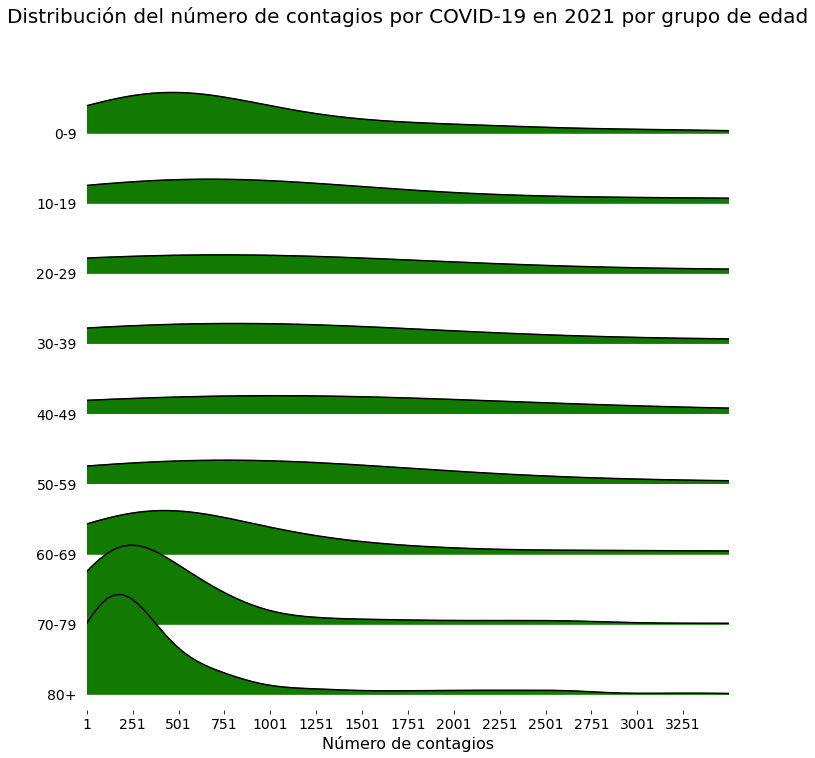

In [169]:
plt.figure()
fig, axs = joypy.joyplot(df_ridgeline, by="grupo_edad", column="num_casos", figsize=(10,10), color="#137a01")
for ax in axs:
    ax.set_xlim([1,3500])
    ax.set_xticks(range(1,3501,250))
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
plt.xlabel("Número de contagios", fontsize=16)
plt.title("Distribución del número de contagios por COVID-19 en 2021 por grupo de edad", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.savefig('ridgeline.png')